<h1 style="text-align:center;"> Olympic Gold Medal Analysis </h1>

![Image of olympic athlete with microphone and signs around](images/logo.png)

### Data Sources
* [Olympic Host](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv)    
* [Olympic Medal](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_medals.csv)    
* [Olympic Games (*link missing*)]()     
* [World Population](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset)     
* [GDP (*link missing*)]()

## Proposal Questions
1. 
2. 
3. 
4. 
5.

# Olympic Analysis

1. Import Libraries
2. Clean & Merge Datasets
3. Analysis #1
4. Analysis #1
5. Analysis #1
6. Analysis #1

In [609]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

17427.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [610]:
# Read in CSV files for retail, olympic host, and olympic medals data
olympic_host_data = pd.read_csv('data/olympic_hosts.csv')
olympic_medals_data = pd.read_csv('data/olympic_analysis.csv')
world_population_data = pd.read_csv('data/world_population.csv')
gdp_data = pd.read_csv('data/gdp.csv')


display(olympic_host_data.head())
display(olympic_medals_data.head())
display(world_population_data.head())
display(gdp_data.head())

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [611]:
# Slice each dataframe to get Summer data only (game_season & edition columns)
olympic_host_data = olympic_host_data[olympic_host_data['game_season'] == 'Summer']
olympic_medals_data = olympic_medals_data[olympic_medals_data['edition'].str.contains('Summer')]

In [612]:
# Slice each dataframe for relevant columns only
olympic_host_data = olympic_host_data[['game_start_date', 'game_end_date', 'game_location', 'game_year']]
olympic_medals_data = olympic_medals_data[['year', 'country', 'gold', 'silver', 'bronze', 'total']]

## Clean and Merge  Datasets
1. Rename Columns to represent dataset & to enable merge capabilities
2. Merge all datasets into one dataframe called 'data'

In [613]:
# Rename game_year column to year
olympic_host_data = olympic_host_data.rename(columns={'game_year' : 'year'})

# Merge dataframes on the year column and inner 
olympic_df = pd.merge(olympic_host_data, olympic_medals_data, on='year', how='inner')
olympic_df


,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113
1,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,People's Republic of China,38,32,19,89
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Japan,27,14,17,58
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Great Britain,22,20,22,64
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,ROC,20,28,23,71
...,...,...,...,...,...,...,...,...,...
1338,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Austria,2,1,2,5
1339,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Australia,2,0,0,2
1340,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Denmark,1,2,3,6
1341,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Switzerland,1,2,0,3


In [614]:
world_population_data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [615]:
# Rename Country/Territory column to country to merge DF
world_population_data = world_population_data.rename(columns={'Country/Territory':'country'})
# Pull out relevant columns from world_population.csv
world_population_data = world_population_data[['country', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']]


In [616]:
# Merge world population with olympic_df on country
olympic_df = pd.merge(olympic_df, world_population_data, on='country', how='inner')
olympic_df.columns

Index(['game_start_date', 'game_end_date', 'game_location', 'year', 'country',
       'gold', 'silver', 'bronze', 'total', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population'],
      dtype='object')

## Clean and Merge GDP to olympic_df

In [617]:
gdp_data = gdp_data.rename(columns={'Country Name' : 'country'})

In [618]:
gdp_data.columns

Index(['country', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [619]:
# Cut down GDP columns to relevant columns for analysis
gdp_data = gdp_data[['country', '1970', '1980', '1990', '2000', '2010', '2015', '2020']]

# Merge GDP columns to olympic_df on country

data = pd.merge(olympic_df, gdp_data, on='country', how='inner')
data

,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total,Continent,...,1990 Population,1980 Population,1970 Population,1970,1980,1990,2000,2010,2015,2020
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113,North America,...,248083732,223140018,200328340,1.073303e+12,2.857307e+12,5.963144e+12,1.025235e+13,1.499205e+13,1.823830e+13,2.095303e+13
1,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Japan,27,14,17,58,Asia,...,123686321,117624196,105416839,2.126092e+11,1.105386e+12,3.132818e+12,4.968359e+12,5.759072e+12,4.444931e+12,5.057759e+12
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Australia,17,7,22,46,Oceania,...,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Netherlands,10,12,14,36,Europe,...,14944548,14130387,13037686,3.816472e+10,1.951521e+11,3.183305e+11,4.164428e+11,8.465549e+11,7.652649e+11,9.138654e+11
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,France,10,12,11,33,Europe,...,56412897,53713830,50523586,1.484564e+11,7.012884e+11,1.269180e+12,1.362249e+12,2.642610e+12,2.438208e+12,2.630318e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Hungary,2,1,3,6,Europe,...,10375989,10698679,10315366,NaN,NaN,NaN,4.721841e+10,1.322311e+11,1.252103e+11,1.558084e+11
1083,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Austria,2,1,2,5,Europe,...,7678729,7547561,7465301,1.537301e+10,8.205891e+10,1.664634e+11,1.967998e+11,3.918927e+11,3.818176e+11,4.332585e+11
1084,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Australia,2,0,0,2,Oceania,...,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12
1085,1896-04-06T11:38:39Z,1896-04-15T11:39:39Z,Greece,1896,Denmark,1,2,3,6,Europe,...,5144623,5125392,4922963,1.707546e+10,7.112753e+10,1.382473e+11,1.641587e+11,3.219953e+11,3.026731e+11,3.560849e+11


# Question 1: Is there a significant increase in medal counts for countries that host the Olympics compared to non-hosting years?

1. Research the past three data poin of host cities 
    - Slice dataframe for relevant analysis data
    - Identify all unique host cities



In [620]:
hosting_df = data[['year', 'game_location', 'country', 'total']]

In [621]:
# Create empty DataFrames for host year and non-host year data
host_year = []  # Update column names as per your DataFrame
non_host_year = []

# Assuming 'df' is your original DataFrame
for index, row in hosting_df.iterrows():
    if row['country'] == row['game_location']:
        host_year.append(row)
    else:
        non_host_year.append(row)

# Create Host Year and Non-Host Year Dataframes
host_year_df = pd.DataFrame(host_year).set_index('year').sort_index()
non_host_year_df = pd.DataFrame(non_host_year).set_index('year').sort_index()
display(host_year_df.head())
display(non_host_year_df.head())


,game_location,country,total
year,,,
1896,Greece,Greece,47
1900,France,France,112
1904,United States,United States,248
1912,Sweden,Sweden,65
1920,Belgium,Belgium,42


,game_location,country,total
year,,,
1896,Greece,Switzerland,3
1896,Greece,United States,20
1896,Greece,Germany,13
1896,Greece,France,11
1896,Greece,Denmark,6


In [622]:
# Rename total columns to differentiate dataframes
host_year_df = host_year_df.rename(columns={'total': 'host_total'})
non_host_year_df = non_host_year_df.rename(columns={'total' : 'non_host_total'})

# Drop game_location column 
host_year_df = host_year_df.drop(columns=['game_location', 'country'])
non_host_year_df = non_host_year_df.drop(columns=['game_location', 'country'])

# Sort host_year_df index column
host_year_df = host_year_df.sort_index(ascending=True)
display(host_year_df.head())
display(non_host_year_df.head())

,host_total
year,
1896,47
1900,112
1904,248
1912,65
1920,42


,non_host_total
year,
1896,3
1896,20
1896,13
1896,11
1896,6


In [623]:
# Calculate the median value of non_host_total_medal by year
median_non_host_total_by_year = non_host_year_df.groupby(level=0)['non_host_total'].median()
# Create Dataframe for median_non_host_total_by_year
median_non_host_total_by_year = pd.DataFrame(median_non_host_total_by_year).reset_index()
median_non_host_total_by_year.head()

,year,non_host_total
0,1896,6.0
1,1900,5.0
2,1904,4.0
3,1908,8.0
4,1912,8.0


In [624]:
# Concatenate dataframes & Standardize the data
combined_df = pd.merge(host_year_df, median_non_host_total_by_year, on='year', how='inner').set_index('year')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)
scaled_data

array([[-0.29059273,  0.75462929],
       [ 0.82049712,  0.17836692],
       [ 3.14523897, -0.39789544],
       [ 0.01709369,  1.90715402],
       [-0.37606118,  3.05967875],
       [-0.39315487, -0.39789544],
       [-0.70084129, -0.39789544],
       [ 0.78630974,  0.17836692],
       [ 0.63246653,  1.33089165],
       [-0.71793498, -0.39789544],
       [-0.47862332, -0.97415781],
       [-0.59827915, -0.68602662],
       [-0.94015295, -0.39789544],
       [-0.90596557, -0.39789544],
       [ 1.88030591, -0.97415781],
       [-0.71793498, -0.97415781],
       [ 0.63246653, -0.97415781],
       [-0.10256214,  0.17836692],
       [-0.82049712,  0.17836692],
       [-0.76921605, -0.39789544],
       [-0.10256214, -0.39789544]])

In [625]:
# Split Data into Training and Testing Sets
X = scaled_data[:, 1]
y = scaled_data[:, 0]

# Reshape X and y to a 2D array
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [626]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [627]:
y_pred = model.predict(X_test)

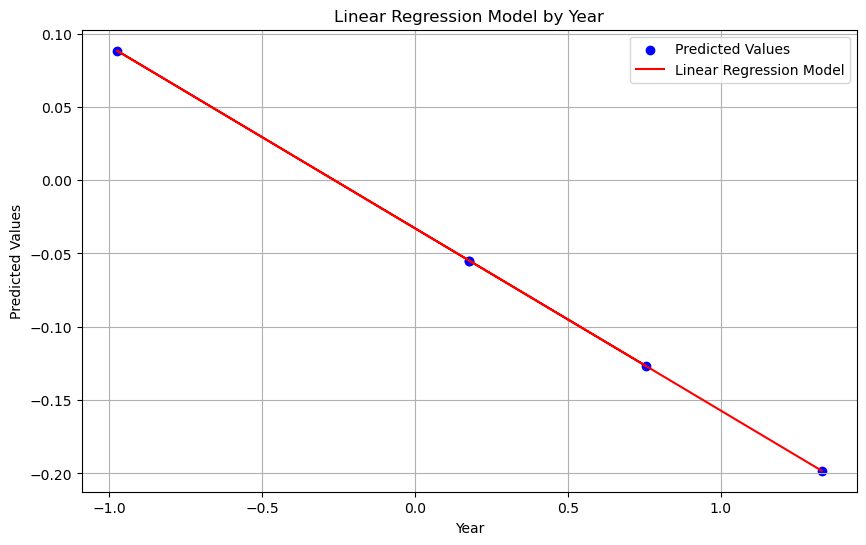

In [628]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_pred, color='blue', label='Predicted Values')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model by Year')
plt.legend()
plt.grid(True)
plt.show()

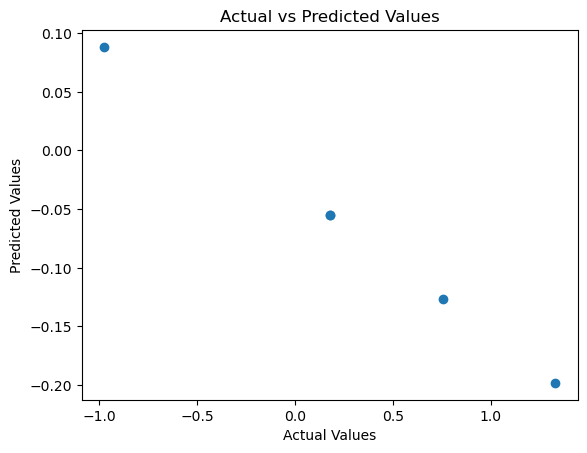

In [632]:
# Plot 
plt.scatter(X_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [ ]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.42707738629810005


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


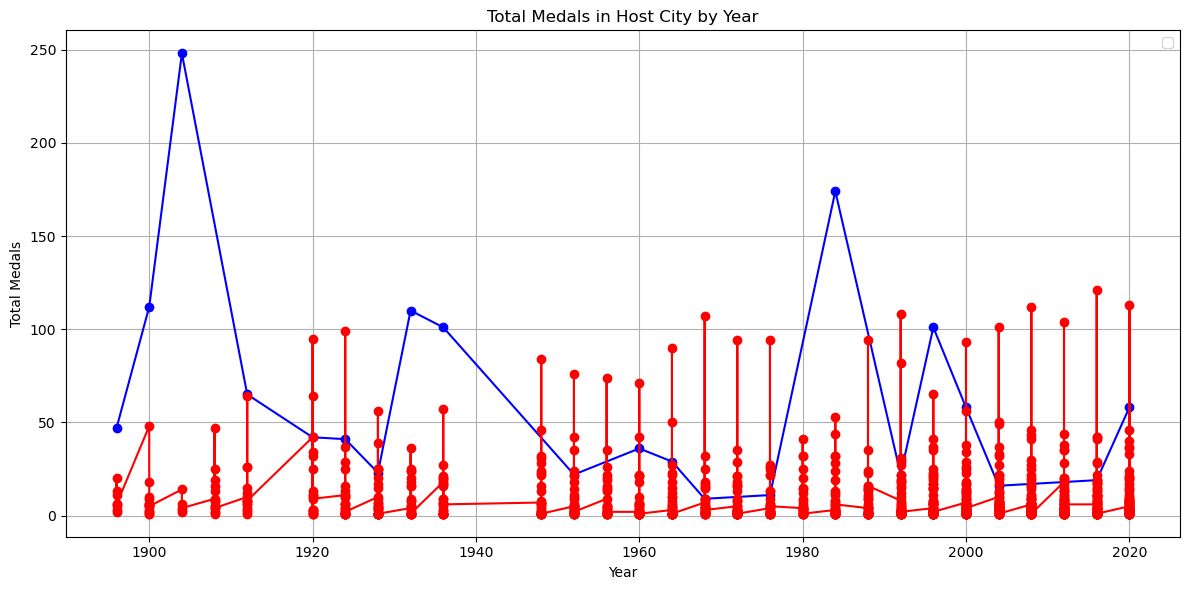

In [ ]:
# Plot Total Medals in Host City vs Non_Host Medal Data
# Create separate plots for host city and non-host city
plt.figure(figsize=(12, 6))

# Plot total medals in host city by year and non_host_city by year to compare
plt.plot(host_year_df.index, host_year_df['host_total'], marker='o', color='b')
plt.plot(non_host_year_df.index, non_host_year_df['non_host_total'], marker='o', color='r')
plt.title('Total Medals in Host City by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Is there a correlation between the Total Olympic Medals vs the Host City Total Medals By Year

1. Calcuate the total number of medals per year  and merge to original dataframe.
2. Pull on relevant columns and plot the results



In [ ]:
# Calculate the total number of medals per year
total_medals_by_year = olympic_df.copy()
total_medals_by_year = olympic_df.groupby('year')['total'].sum().reset_index().copy()
total_medals_by_year = total_medals_by_year.rename(columns={'total':'year_total'})
total_medals_by_year.head()

,year,year_total
0,1896,113
1,1900,239
2,1904,277
3,1908,168
4,1912,264


In [ ]:
# Pull relevant 2020 and 2022 population columns for analysis
population_df = olympic_df[['year','game_location', 'country', 'gold', 'silver', 'bronze', 'total' ]]
population_df.head()

,year,game_location,country,gold,silver,bronze,total
0,2020,Japan,United States,39,41,33,113
1,2020,Japan,Japan,27,14,17,58
2,2020,Japan,Australia,17,7,22,46
3,2020,Japan,Netherlands,10,12,14,36
4,2020,Japan,France,10,12,11,33


In [ ]:
# Return all unique host cities 
host_medal_df = population_df[population_df['game_location'] == population_df['country']]

# Drop game_location, gold, silver, and bronze columns and display dataframe
host_medal_df = host_medal_df.drop(columns=['game_location', 'gold', 'silver', 'bronze'])


# Merge total_medals_by_year with host_medals_df to get the to
host_total_merged_df = pd.merge(host_medal_df, total_medals_by_year, on='year', how='inner').set_index('year').sort_index()
host_total_merged_df.head()

,country,total,year_total
year,,,
1896,Greece,47,113
1900,France,112,239
1904,United States,248,277
1912,Sweden,65,264
1920,Belgium,42,404


<Axes: title={'center': 'Olympics Total Medals vs Host City Total Medals By Year'}, xlabel='Year', ylabel='Number of Medals'>

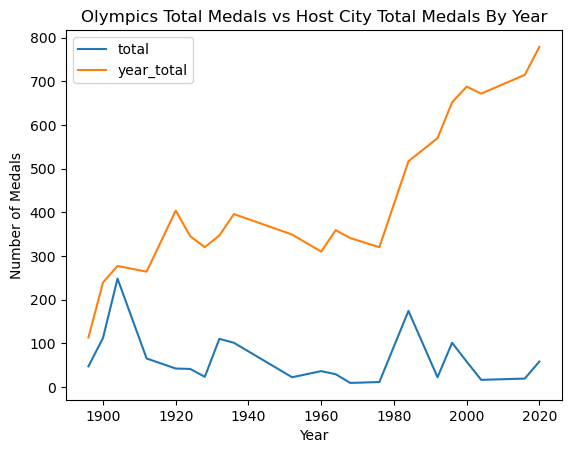

In [ ]:
host_total_merged_df.plot(title="Olympics Total Medals vs Host City Total Medals By Year", xlabel="Year", ylabel="Number of Medals")

In [ ]:
# Access control over total and year_total columns
total_column = host_total_merged_df['total'].values
year_total_column = host_total_merged_df['year_total'].values

correlation = np.corrcoef(total_column, year_total_column)
correlation = pd.DataFrame(correlation)
correlation


,0,1
0,1.000000,-0.120365
1,-0.120365,1.000000


<h2 style="color:gold;text-decoration:underline"> Results</h2>

<h2>Total Olympic Medals By Year vs Host Cities Total Medal Count</h2>
<h3> Correlation </h3><p style="font-family:tahoma;">There are some years that standout on the chart, for example between 1930 & 1940, and between 1980 & 1990. This does not show any significant insight, however after perforing the correlation between the total olympic medals for each year, compared to the total host cities medals, it showed a very weak correlation.</p>
<hr>

## Is there a correlation between Total Olympic Medals and GDP
1. Create dataframe for Total Medals and GDP Analysis
2. Calculate median GDP for each (year) gdp column
3. Merge results with step 1 & plot

In [ ]:
data.head()

,game_start_date,game_end_date,game_location,year,country,gold,silver,bronze,total,Continent,...,1990 Population,1980 Population,1970 Population,1970,1980,1990,2000,2010,2015,2020
0,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,United States,39,41,33,113,North America,...,248083732,223140018,200328340,1.073303e+12,2.857307e+12,5.963144e+12,1.025235e+13,1.499205e+13,1.823830e+13,2.095303e+13
1,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Japan,27,14,17,58,Asia,...,123686321,117624196,105416839,2.126092e+11,1.105386e+12,3.132818e+12,4.968359e+12,5.759072e+12,4.444931e+12,5.057759e+12
2,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Australia,17,7,22,46,Oceania,...,17048003,14706322,12595034,4.133722e+10,1.500323e+11,3.113267e+11,4.155762e+11,1.147589e+12,1.350534e+12,1.327836e+12
3,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,Netherlands,10,12,14,36,Europe,...,14944548,14130387,13037686,3.816472e+10,1.951521e+11,3.183305e+11,4.164428e+11,8.465549e+11,7.652649e+11,9.138654e+11
4,2021-07-23T11:00:00Z,2021-08-08T14:00:00Z,Japan,2020,France,10,12,11,33,Europe,...,56412897,53713830,50523586,1.484564e+11,7.012884e+11,1.269180e+12,1.362249e+12,2.642610e+12,2.438208e+12,2.630318e+12


## Does the host city affect the number of medals won ? 

In this step our goal is to identify the differences between  a country's gold medal count when they host the olympics vs the median number of gold medals they have achieve historically. 

1. Slice data to show only relevant columns for Japan. 
2. Sort dataframe by year




In [ ]:



# Grab relevant columns from olympic_df
host_city_df = olympic_df[['game_end_date', 'game_location', 'year', 'country', 'gold', 'silver', 'bronze', 'total' ]]

# Separate pull host city Japan Population and Medal Data
japan = host_city_df[host_city_df['country'] == 'Japan']

# Change game_end_date datatype to datetime
japan.loc[:, 'game_end_date'] = pd.to_datetime(japan['game_end_date'])

# Set game_end_date to datetime datatype
japan = japan.set_index('game_end_date')

japan

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,game_location,year,country,gold,silver,bronze,total
game_end_date,,,,,,,
2021-08-08 14:00:00+00:00,Japan,2020,Japan,27,14,17,58
2016-08-21 21:00:00+00:00,Brazil,2016,Japan,12,8,21,41
2012-08-12 19:00:00+00:00,Great Britain,2012,Japan,7,14,17,38
2008-08-24 12:00:00+00:00,China,2008,Japan,9,8,8,25
2004-08-29 18:00:00+00:00,Greece,2004,Japan,16,9,12,37
2000-10-01 09:00:00+00:00,Australia,2000,Japan,5,8,5,18
1996-08-05 21:00:00+00:00,United States,1996,Japan,3,6,5,14
1992-08-09 18:00:00+00:00,Spain,1992,Japan,3,8,11,22
1988-10-02 10:00:00+00:00,Republic of Korea,1988,Japan,4,3,7,14
